In [40]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

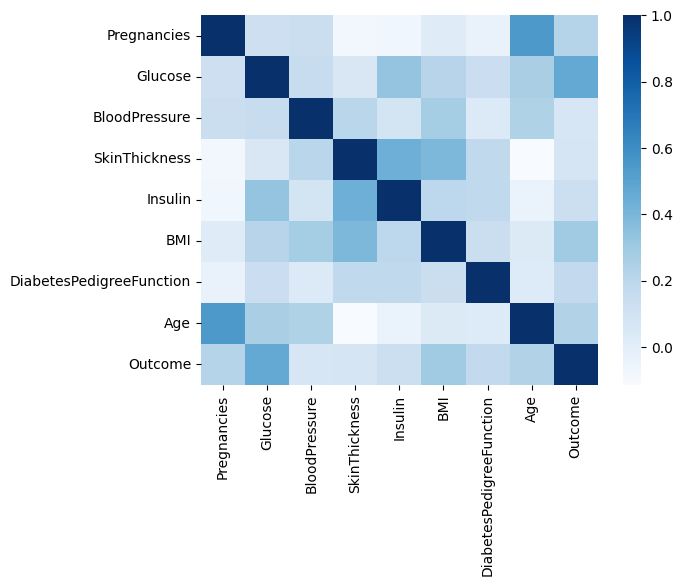

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

cor = df.corr()

sns.heatmap(cor, cmap='Blues')
plt.show()

In [5]:
X = df.drop(columns='Outcome')
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
y = df.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
158,2,88,74,19,53,29.0,0.229,22
573,2,98,60,17,120,34.7,0.198,22
429,1,95,82,25,180,35.0,0.233,43
740,11,120,80,37,150,42.3,0.785,48
589,0,73,0,0,0,21.1,0.342,25
...,...,...,...,...,...,...,...,...
407,0,101,62,0,0,21.9,0.336,25
601,6,96,0,0,0,23.7,0.190,28
243,6,119,50,22,176,27.1,1.318,33
321,3,112,74,30,0,31.6,0.197,25


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn.predict(X_test)

In [36]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred)

0.4383561643835616

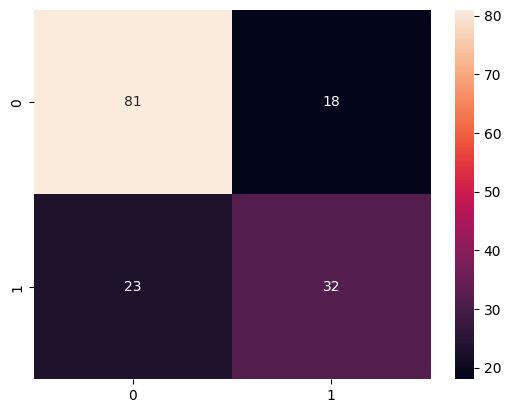

In [37]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        99
           1       0.64      0.58      0.61        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154


In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [47]:
print(knn_gscv.cv_results_['rank_test_score'])

[24 23 22 21 20 19 18  6 16 11  9  3  2  1 17 15  4  8  5  7 12 10 13 13]


In [48]:
knn_gscv.best_params_

{'n_neighbors': 14}

In [49]:
knn = KNeighborsClassifier(n_neighbors=14).fit(X_train, y_train)

In [50]:
y_pred = knn.predict(X_test)

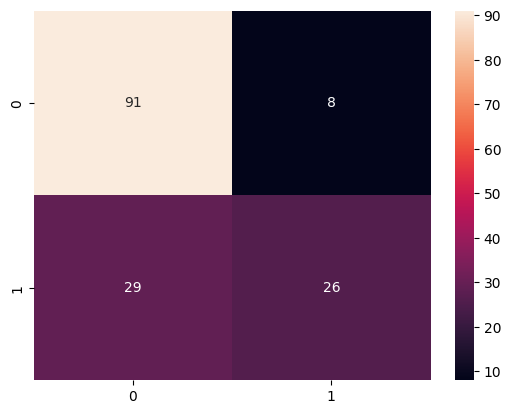

In [51]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [63]:
jaccard_score(y_test, y_pred)

0.4126984126984127